In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

Read in the results from `evaluation_results.txt`

In [2]:
results = []
with open("evaluation_results.txt", "r") as file:
    current_result = {}
    for line in file:
        line = line.strip()
        if line.endswith(":"):
            if current_result:
                results.append(current_result)
            current_result = {"match": line[:-1]}
        elif line:
            key, value = line.split(": ", 1)
            if key in ['move_times', 'final_elo_bot1', 'final_elo_bot2']:
                current_result[key] = ast.literal_eval(value)
            else:
                current_result[key] = int(value) if value.isdigit() else float(value)
    if current_result:
        results.append(current_result)


Convert results to Pandas Dataframe.

In [3]:
df = pd.DataFrame(results)
df.set_index('match', inplace=True)

Calculate Performance Metrics

In [4]:
df['total_games'] = df['bot1_wins'] + df['bot2_wins'] + df['draws']
df['bot1_win_rate'] = df['bot1_wins'] / df['total_games']
df['bot2_win_rate'] = df['bot2_wins'] / df['total_games']
df['draw_rate'] = df['draws'] / df['total_games']
df['average_game_length (moves)'] = df['total_moves'] / df['total_games']
df['average_time_per_game'] = df['total_time'] / df['total_games']

df.head()

,bot1_wins,bot2_wins,draws,total_moves,total_time,move_times,final_elo_bot1,final_elo_bot2,total_games,bot1_win_rate,bot2_win_rate,draw_rate,average_game_length (moves),average_time_per_game
match,,,,,,,,,,,,,,
random_vs_mcts,0,2,0,110,236.694387,"[[4.733966588973999, 2.3365020751953125e-05, 5...",1469.435873,1529.165399,2,0.0,1.0,0.0,55.0,118.347193
random_vs_mcts_trained,0,2,0,110,239.734805,"[[5.163118362426758, 2.384185791015625e-05, 4....",1444.027891,1553.462409,2,0.0,1.0,0.0,55.0,119.867403
mcts_vs_random,2,0,0,168,349.137498,"[[4.5299530029296875e-05, 5.1754677295684814, ...",1484.024323,1515.208543,2,1.0,0.0,0.0,84.0,174.568749
mcts_vs_mcts_trained,1,1,0,511,1395.767740,"[[4.953465461730957, 4.977950572967529, 5.1378...",1488.177192,1511.237163,2,0.5,0.5,0.0,255.5,697.883870
mcts_trained_vs_random,2,0,0,168,354.327079,"[[9.5367431640625e-05, 5.047345399856567, 2.47...",1520.764465,1480.147017,2,1.0,0.0,0.0,84.0,177.163539


Calculate Average Move Times for `Bot 1` and `Bot 2`

In [5]:
df['average_move_time_bot_1'] = df['move_times'].apply(lambda x: np.mean(x[0]) if x[0] else 0)
df['average_move_time_bot_2'] = df['move_times'].apply(lambda x: np.mean(x[1]) if x[1] else 0)

df.head()

,bot1_wins,bot2_wins,draws,total_moves,total_time,move_times,final_elo_bot1,final_elo_bot2,total_games,bot1_win_rate,bot2_win_rate,draw_rate,average_game_length (moves),average_time_per_game,average_move_time_bot_1,average_move_time_bot_2
match,,,,,,,,,,,,,,,,
random_vs_mcts,0,2,0,110,236.694387,"[[4.733966588973999, 2.3365020751953125e-05, 5...",1469.435873,1529.165399,2,0.0,1.0,0.0,55.0,118.347193,2.288988,2.049376
random_vs_mcts_trained,0,2,0,110,239.734805,"[[5.163118362426758, 2.384185791015625e-05, 4....",1444.027891,1553.462409,2,0.0,1.0,0.0,55.0,119.867403,2.297187,2.091520
mcts_vs_random,2,0,0,168,349.137498,"[[4.5299530029296875e-05, 5.1754677295684814, ...",1484.024323,1515.208543,2,1.0,0.0,0.0,84.0,174.568749,2.100638,2.055737
mcts_vs_mcts_trained,1,1,0,511,1395.767740,"[[4.953465461730957, 4.977950572967529, 5.1378...",1488.177192,1511.237163,2,0.5,0.5,0.0,255.5,697.883870,2.291223,3.630201
mcts_trained_vs_random,2,0,0,168,354.327079,"[[9.5367431640625e-05, 5.047345399856567, 2.47...",1520.764465,1480.147017,2,1.0,0.0,0.0,84.0,177.163539,2.122825,2.095330


1. Win Rates:

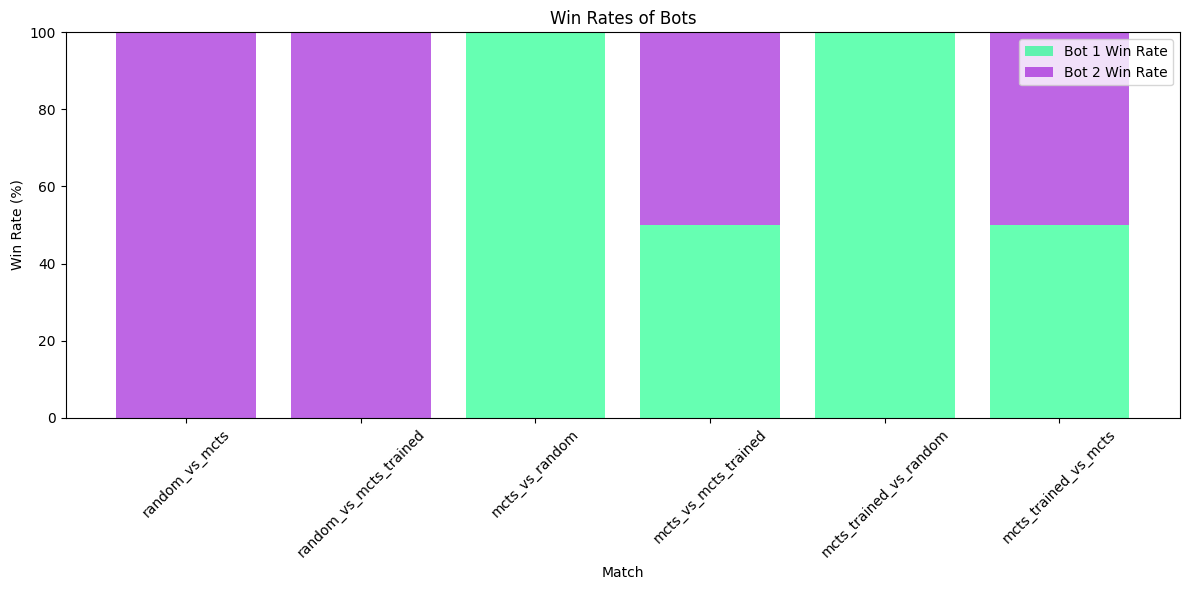

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['bot1_win_rate'] * 100, label='Bot 1 Win Rate', alpha=0.6, color='springgreen')
plt.bar(df.index, df['bot2_win_rate'] * 100, label='Bot 2 Win Rate', alpha=0.6, bottom=df['bot1_win_rate'] * 100, color='darkviolet')
plt.xlabel('Match')
plt.ylabel('Win Rate (%)')
plt.title('Win Rates of Bots')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Average Game Length (Avg. number of moves):

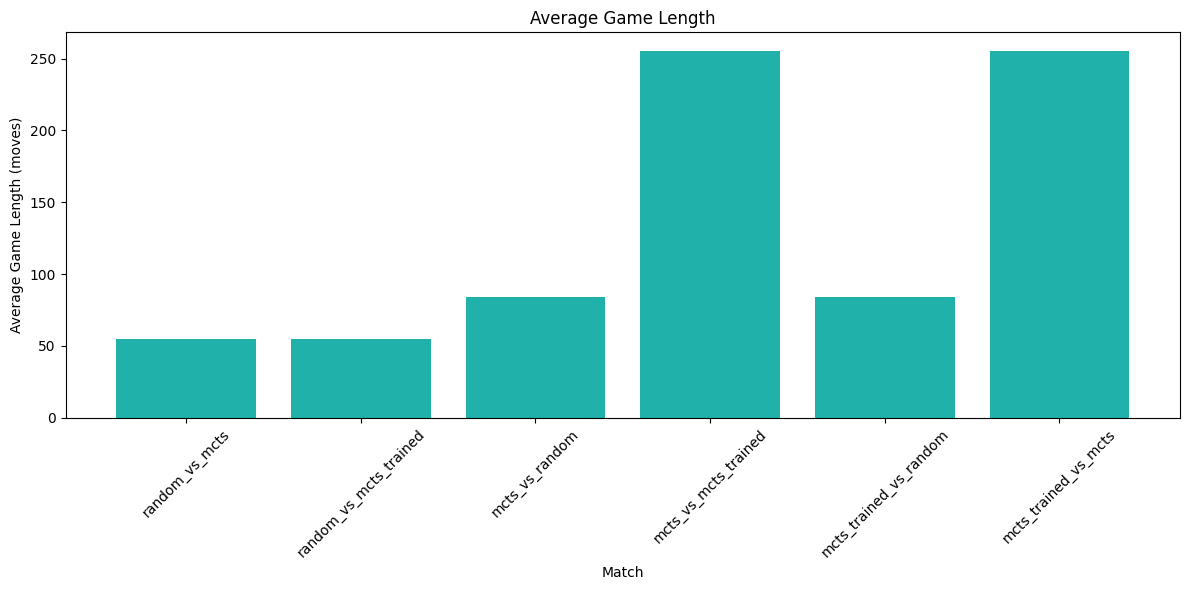

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['average_game_length (moves)'], color='lightseagreen')
plt.xlabel('Match')
plt.ylabel('Average Game Length (moves)')
plt.title('Average Game Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Average time per game:

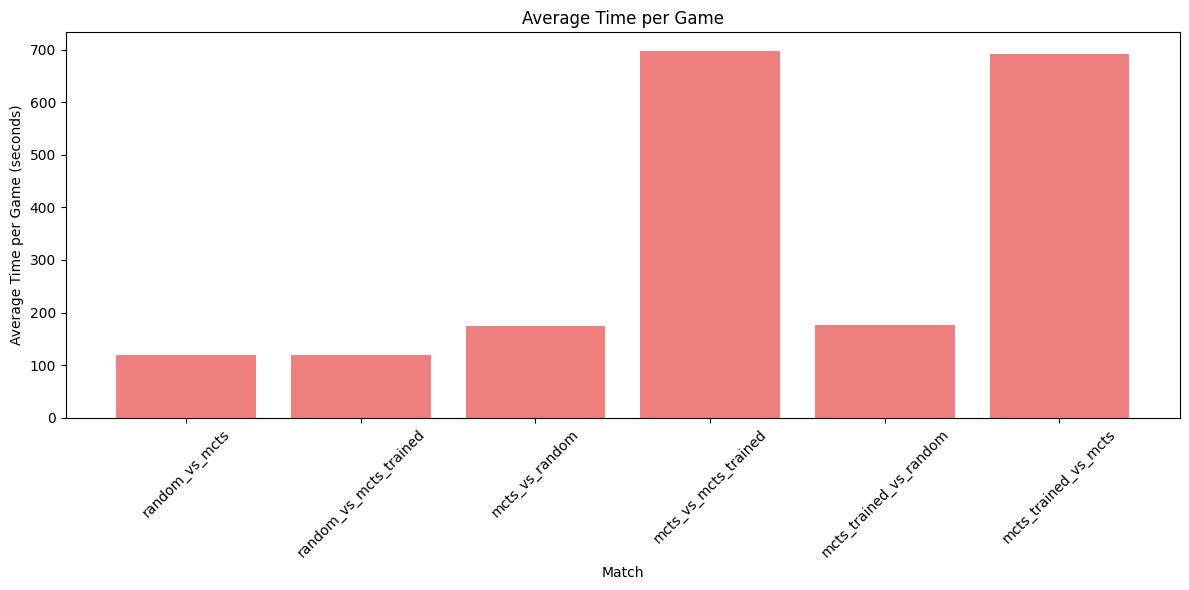

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['average_time_per_game'], color='lightcoral')
plt.xlabel('Match')
plt.ylabel('Average Time per Game (seconds)')
plt.title('Average Time per Game')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Average Moves times for `bot 1` and `bot 2`

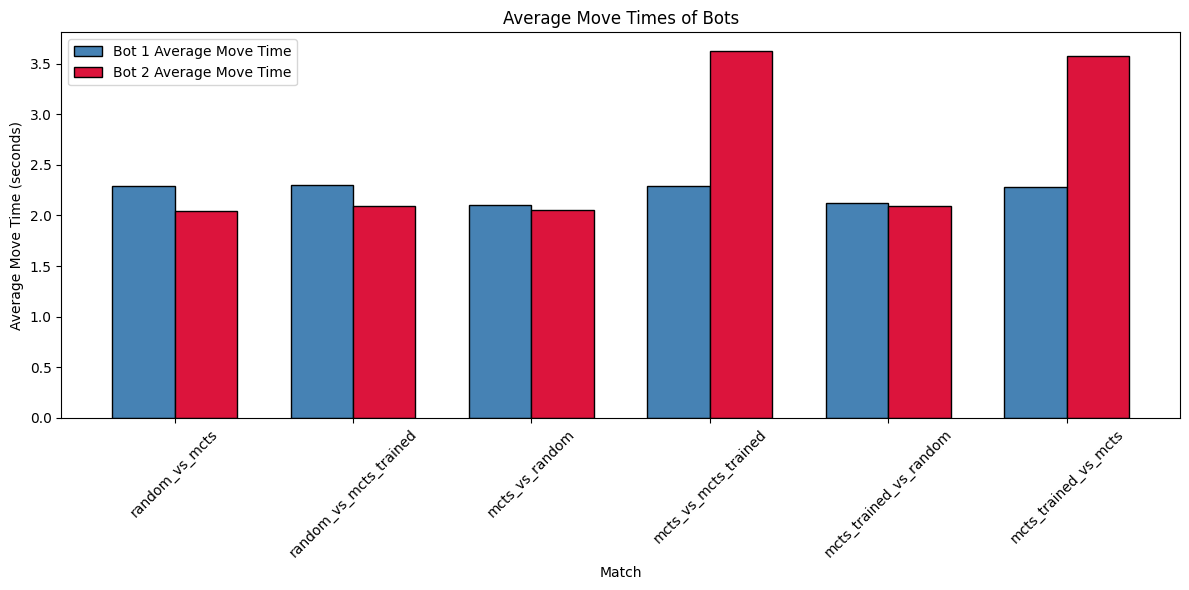

In [16]:
bar_width = 0.35

# Define the positions of the bars
r1 = range(len(df.index))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, df['average_move_time_bot_1'], color='steelblue', width=bar_width, edgecolor='black', label='Bot 1 Average Move Time')
plt.bar(r2, df['average_move_time_bot_2'], color='crimson', width=bar_width, edgecolor='black', label='Bot 2 Average Move Time')

plt.xlabel('Match')
plt.ylabel('Average Move Time (seconds)')
plt.title('Average Move Times of Bots')
plt.xticks([r + bar_width/2 for r in range(len(df.index))], df.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

5. Final Elo Ratings:

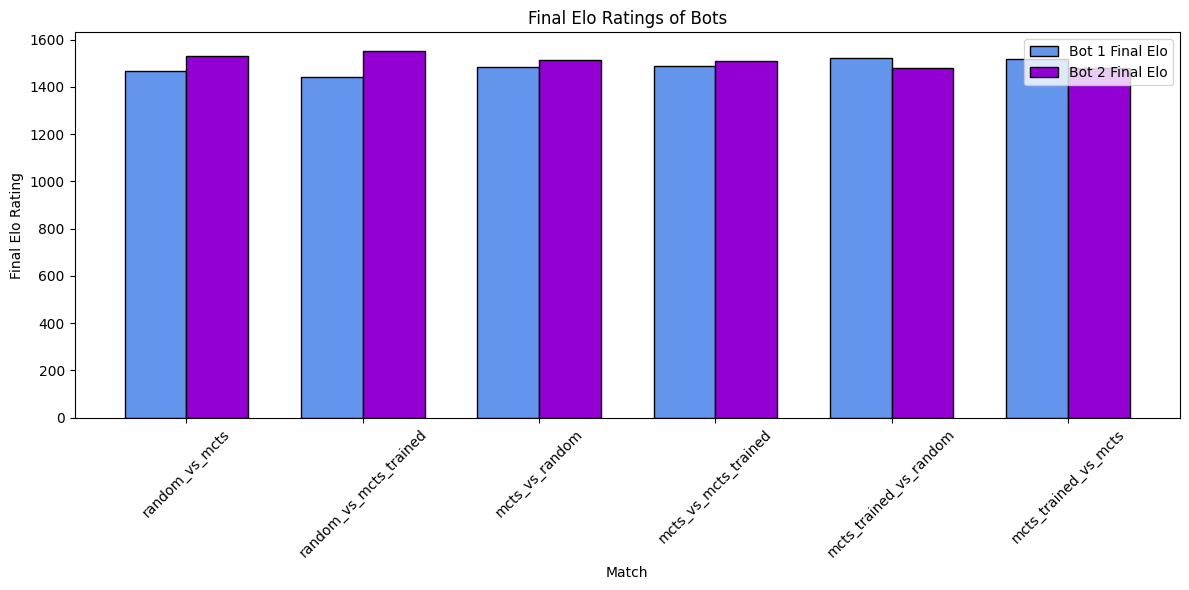

In [17]:
bar_width = 0.35

# Define the positions of the bars
r1 = range(len(df.index))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, df['final_elo_bot1'], color='cornflowerblue', width=bar_width, edgecolor='black', label='Bot 1 Final Elo')
plt.bar(r2, df['final_elo_bot2'], color='darkviolet', width=bar_width, edgecolor='black', label='Bot 2 Final Elo')

plt.xlabel('Match')
plt.ylabel('Final Elo Rating')
plt.title('Final Elo Ratings of Bots')
plt.xticks([r + bar_width/2 for r in range(len(df.index))], df.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

6. Summary of Statistics:

In [18]:
print("Summary Statistics:")
display(df[['bot1_win_rate', 'bot2_win_rate', 'average_game_length (moves)', 'average_time_per_game', 'average_move_time_bot_1', 'average_move_time_bot_2', 'final_elo_bot1', 'final_elo_bot2']])

Summary Statistics:


,bot1_win_rate,bot2_win_rate,average_game_length (moves),average_time_per_game,average_move_time_bot_1,average_move_time_bot_2,final_elo_bot1,final_elo_bot2
match,,,,,,,,
random_vs_mcts,0.0,1.0,55.0,118.347193,2.288988,2.049376,1469.435873,1529.165399
random_vs_mcts_trained,0.0,1.0,55.0,119.867403,2.297187,2.091520,1444.027891,1553.462409
mcts_vs_random,1.0,0.0,84.0,174.568749,2.100638,2.055737,1484.024323,1515.208543
mcts_vs_mcts_trained,0.5,0.5,255.5,697.883870,2.291223,3.630201,1488.177192,1511.237163
mcts_trained_vs_random,1.0,0.0,84.0,177.163539,2.122825,2.095330,1520.764465,1480.147017
mcts_trained_vs_mcts,0.5,0.5,255.5,691.808336,2.283407,3.573830,1518.639553,1482.179825
